# Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.metrics import accuracy_score, r2_score

# import dataset

In [5]:
X, y = load_diabetes(return_X_y=True)

In [6]:
X.shape

(442, 10)

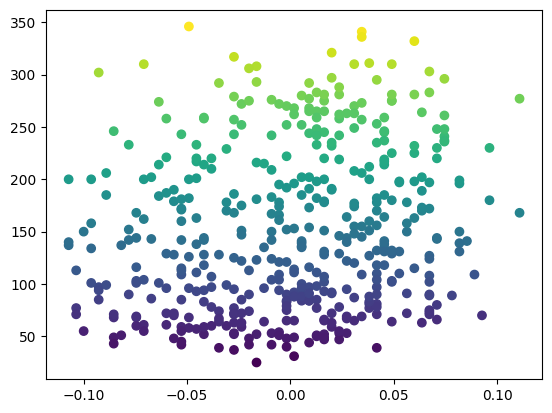

In [7]:
plt.scatter(X[:, 0], y, c=y)

# apply train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply linear regression

In [9]:
reg1 = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [10]:
reg1.fit(X_train, y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [11]:
reg1.intercept_, reg1.coef_

(array([149.78855103]),
 array([  42.23248946, -135.18724539,  403.74782031,  264.62934465,
         -32.47978017,  -73.11673632, -180.21660204,  132.05764485,
         306.45987413,  114.52406118]))

In [12]:
r2_score(y_test, reg1.predict(X_test))

0.45305832969577664

# Apply Ridge regression

In [13]:
reg2 = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')
reg2.fit(X_train, y_train)
reg2.intercept_, reg2.coef_

(151.34198054847556,
 array([  38.48350697, -241.35179372,  543.83518162,  346.78283303,
        -827.70199148,  437.17375182,  116.9497504 ,  260.75926817,
         696.12922689,   49.74344986]))

In [14]:
r2_score(y_test, reg2.predict(X_test))

0.45342802980618724

# Create Custom Ridge Regression using Gradient Descent

In [24]:
class CustomRidge:
  def __init__(self, lr=0.01, epochs=10, alpha=10) -> None:

    self.coef_ = None
    self.intercept_ = None
    self.lr = lr
    self.epochs = epochs
    self.alpha = alpha

  def fit(self, X_train, y_train):
    self.intercept_ = 0
    self.coef_ = np.ones(X_train.shape[1])
    omega = np.insert(self.coef_,0,self.intercept_)
    X_train = np.insert(X_train,0,1,axis=1)

        # self.coef_ = np.ones(X_train.shape[1])
        # self.intercept_ = 0
        # thetha = np.insert(self.coef_,0,self.intercept_)
        # X_train = np.insert(X_train,0,1,axis=1)

    for i in range(self.epochs):
      first_part = np.dot(X_train.T, X_train).dot(omega)
      second_part = np.dot(X_train.T, y_train)
      third_part =  (self.alpha*omega)
      omega_der = first_part - second_part + third_part

      # thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha

    omega = omega - (self.lr * omega_der)

    self.intercept_ = omega[0]
    self.coef_ = omega[1:]

  def predict(self, X_test):
    return self.intercept_ + np.dot(X_test, self.coef_)

In [25]:
reg3 = CustomRidge(epochs=500, lr=0.01, alpha=0.001)
reg3.fit(X_train, y_train)
r2_score(y_test, reg3.predict(X_test))

-29.66706815738625

In [22]:
reg3.intercept_, reg3.coef_

(542.6699713341858,
 array([ 4.26230382,  1.17874675,  9.77314817,  7.53793733,  3.28539585,
         2.56045481, -4.48923831,  6.75708007,  8.88633279,  7.18727253]))

In [23]:
reg2.intercept_, reg2.coef_

(151.34198054847556,
 array([  38.48350697, -241.35179372,  543.83518162,  346.78283303,
        -827.70199148,  437.17375182,  116.9497504 ,  260.75926817,
         696.12922689,   49.74344986]))

In [17]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])


x

array([1, 2, 3, 4, 5])

In [18]:
np.insert(x,0,101)

array([101,   1,   2,   3,   4,   5])